In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'gabriel-predictive-analytics'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "diabetes.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
diabetes = pd.read_csv(file_content_stream)
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Data Distribution

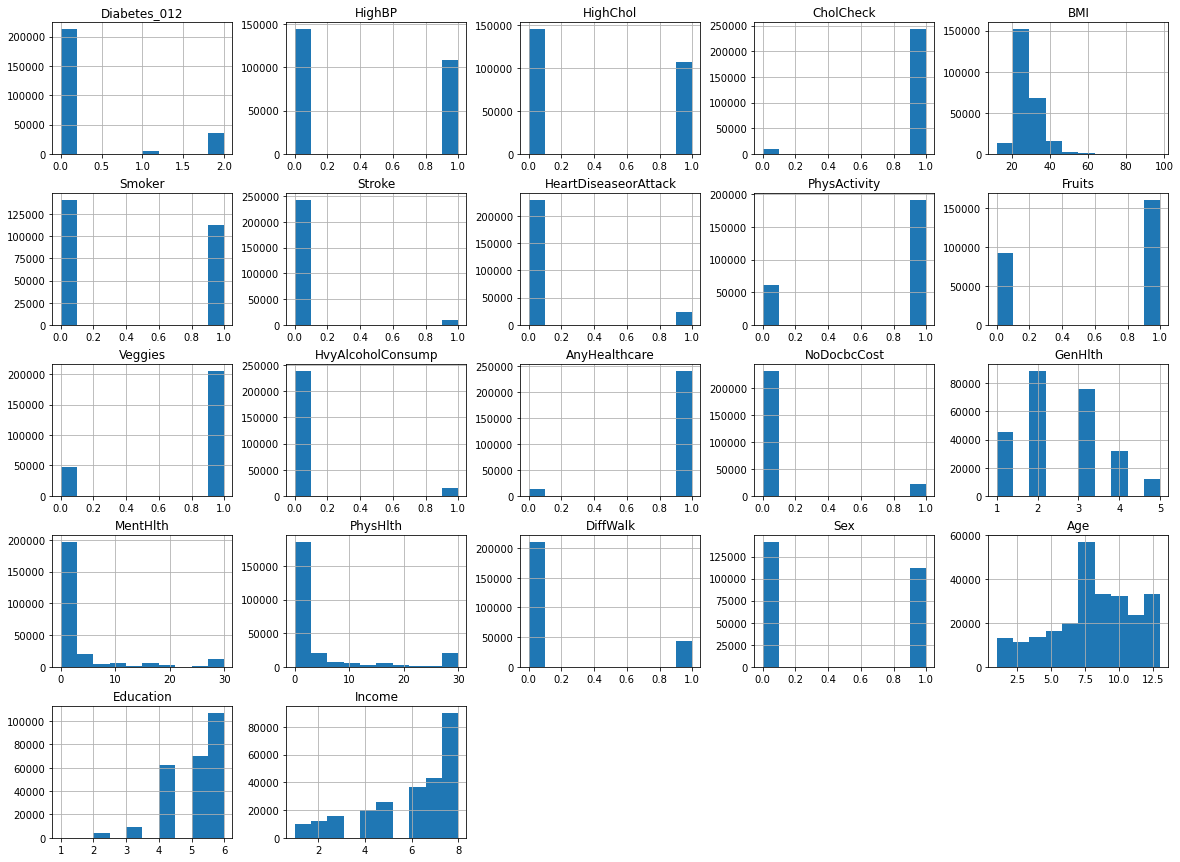

In [2]:
diabetes.hist(figsize = (20, 15));

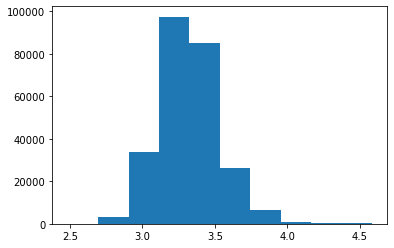

In [3]:
## Applying log to the feature BMI to get a more symmetric distribution
diabetes['BMI_log'] = np.log(diabetes['BMI'])
plt.hist(diabetes['BMI_log']);

#### Visualizing decision tree model

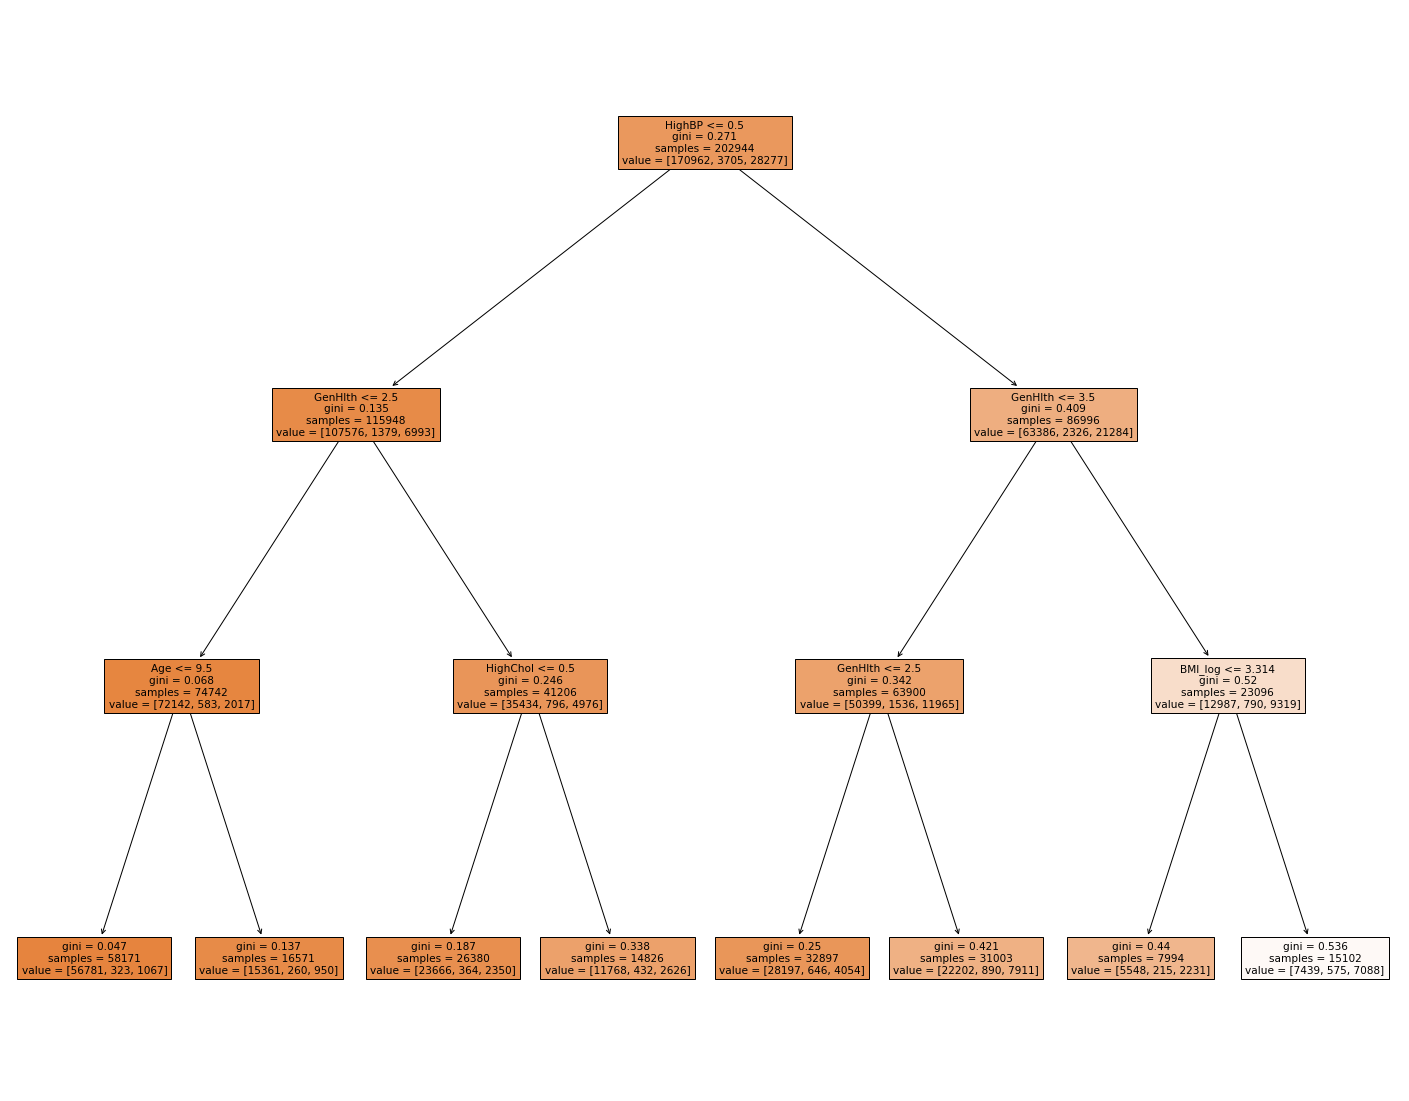

In [4]:
# Selecting input and target variables
X = diabetes.drop(columns = ['Diabetes_012'], axis = 1)
Y = diabetes['Diabetes_012']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

# Building the decision tree on train data-frame
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

# Visualizing the decision-tree model
fig = plt.figure(figsize = (25,20))
plot_tree(tree_md, feature_names = X.columns, filled = True);

In [5]:
"""
To the Left = Yes
To the Right = No

value = [0: No left , 1: left]
"""

'\nTo the Left = Yes\nTo the Right = No\n\nvalue = [0: No left , 1: left]\n'

#### Creating features based on the decision tree visualization

In [6]:
diabetes['feature_1'] = np.where((diabetes['HighBP'] > 0.5) & (diabetes['GenHlth'] > 2.5), 1, 0)
diabetes['feature_2'] = np.where((diabetes['HighBP'] <= 0.5) & (diabetes['GenHlth'] <= 2.5), 1, 0)

#### Getting dummies

In [7]:
## Changing sales to dummy variables
diabetes = pd.concat([diabetes, pd.get_dummies(diabetes['HighBP'])], axis = 1)

diabetes = pd.concat([diabetes, pd.get_dummies(diabetes['Education'])], axis = 1)

diabetes = pd.concat([diabetes, pd.get_dummies(diabetes['Income'])], axis = 1)

diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_log,feature_1,feature_2,0.0,1.0,1.0,2.0,3.0,4.0,5.0,6.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,3.688879,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,3.218876,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,3.332205,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,3.295837,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,3.178054,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [9]:
## Defining the list to store results
results = list()

# Selecting input and target variables
X = diabetes.drop(columns = ['Diabetes_012'], axis = 1)
Y = diabetes['Diabetes_012']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

for i in range(0,2):
    
    # Splitting the data
    X_training, X_testing, Y_training, Y_testing = train_test_split(X_train, Y_train, test_size = 0.2, stratify = Y_train)
    
    # Building Random Forest model
    RF = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_training, Y_training)
    
    # Extracting feature importances
    results.append(RF.feature_importances_)
    
# Changing to a dataframe
results2 = pd.DataFrame(results, columns = X.columns)
results2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_log,feature_1,feature_2,0.0,1.0,1.0,2.0,3.0,4.0,5.0,6.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,0.103561,0.043770,0.000849,0.052965,0.000236,0.001623,0.023903,0.003555,0.000016,0.000043,0.001153,0.000006,0.000004,0.121496,0.000775,0.017449,0.051287,0.000091,0.021268,0.002580,0.012106,0.05665,0.178624,0.075039,0.111253,0.109923,0.0,0.000227,0.000335,0.000061,0.0,0.001750,0.000045,0.000426,0.000438,2.289178e-05,0.000029,0.000000,0.000061,0.006381
1,0.120875,0.047437,0.000712,0.063472,0.000090,0.001498,0.021124,0.003206,0.000008,0.000023,0.001266,0.000007,0.000000,0.101987,0.000562,0.013123,0.063947,0.000102,0.019375,0.002063,0.012605,0.05859,0.197061,0.073179,0.099884,0.087238,0.0,0.000164,0.000031,0.000226,0.0,0.001363,0.000227,0.000634,0.000139,6.894636e-07,0.000027,0.000008,0.000026,0.007721


In [10]:
# Computing averages and sorting by importance
results = pd.DataFrame(results2.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values}).sort_values(by = 'Importance', ascending = False)
results.head(5)

,Feature,Importance
22,feature_1,0.187842
0,HighBP,0.112218
13,GenHlth,0.111741
24,0,0.105569
25,1,0.098580


#### Applying the heredity principle

In [11]:
diabetes['feature_3'] = diabetes['GenHlth'] * diabetes['HighBP']

In [12]:
diabetes['healthy_food'] = diabetes['Fruits'] + diabetes ['Veggies']

In [13]:
diabetes.shape

(253680, 43)

In [ ]:
## diabetes.to_csv('diabetes.csv', index = False)
